In [27]:
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [30]:
# y = ax + b
# Regression
num = 10000
low, high = -10, 10
a, b = 5, 1000
lr = 0.1
X = np.random.uniform(low, high, num)
noise = np.random.normal(size=num, scale=100)
Y = a*X + b + noise

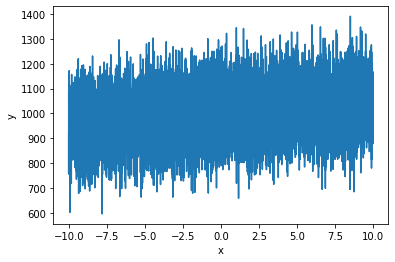

In [31]:
sns.lineplot(x="x", y="y", data=pd.DataFrame({"x": X, "y": Y}))

In [32]:
a_predicted = -100 
b_predicted = -40
n_epochs = 1000
batch_size = 32
lr = 0.01
for epoch in range(n_epochs):
    for step in range(0, num, batch_size):
        da = (-(Y[step:(step+batch_size)] - a_predicted*X[step:(step+batch_size)] - b_predicted)*X[step:(step+batch_size)]).mean()
        db = -(Y[step:(step+batch_size)] - a_predicted*X[step:(step+batch_size)] - b_predicted).mean()
        a_predicted -= lr*da
        b_predicted -= lr*db
    if epoch % 100 == 0 and epoch != 0:
        lr /= 10
        print("Epoch = ", epoch)
        print("a = {:.2f}".format(a), "a_pred = {:.2f}".format(a_predicted))
        print("b = {:.2f}".format(b), "a_pred = {:.2f}".format(b_predicted))
print("Prediction: {} epochs!".format(n_epochs))
print("a = {:.2f}".format(a), "a_pred = {:.2f}".format(a_predicted))
print("b = {:.2f}".format(b), "a_pred = {:.2f}".format(b_predicted))

Epoch =  100
a = 5.00 a_pred = 3.56
b = 1000.00 a_pred = 997.92
Epoch =  200
a = 5.00 a_pred = 4.58
b = 1000.00 a_pred = 998.34
Epoch =  300
a = 5.00 a_pred = 4.77
b = 1000.00 a_pred = 998.34
Epoch =  400
a = 5.00 a_pred = 4.81
b = 1000.00 a_pred = 998.34
Epoch =  500
a = 5.00 a_pred = 4.81
b = 1000.00 a_pred = 998.34
Epoch =  600
a = 5.00 a_pred = 4.81
b = 1000.00 a_pred = 998.34
Epoch =  700
a = 5.00 a_pred = 4.81
b = 1000.00 a_pred = 998.34
Epoch =  800
a = 5.00 a_pred = 4.81
b = 1000.00 a_pred = 998.34
Epoch =  900
a = 5.00 a_pred = 4.81
b = 1000.00 a_pred = 998.34
Prediction: 1000 epochs!
a = 5.00 a_pred = 4.81
b = 1000.00 a_pred = 998.34


In [33]:
#Log regression
num_samples = 1000
X1 = np.random.normal(size=(num_samples,2), scale=10,loc = (50, 5))
X2 = np.random.normal(size=(num_samples,2), scale=10,loc = (-20, -30))
X = np.concatenate([X1, X2])
Y = np.ones(2*num_samples)
Y[:num_samples] = 0
Y[num_samples:] = 1
indexes = np.arange(2*num_samples)
random.shuffle(indexes)
X, Y = X[indexes], Y[indexes]
print(X.shape, Y.shape)

def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

def der_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

(2000, 2) (2000,)


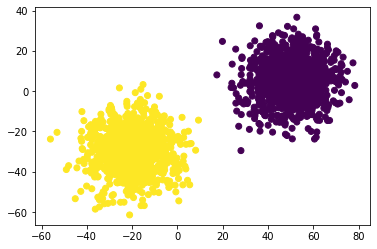

In [34]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [35]:
a_pred = np.array([-5., 3]).reshape(2, 1)
b_pred = np.array([-120.])
lr = 0.1
for epoch in range(3000):
    for step in range(0, num_samples, batch_size):
        x_batch = X[step:(step+batch_size)]
        diff = -(Y[step:(step+batch_size), None] - sigmoid(x_batch.dot(a_pred) + b_pred))
        da = (x_batch.T.dot(diff))
        db = diff.mean()
        a_pred -= lr*da.reshape(2, 1)
        b_pred -= lr*db.reshape(1,)
    if epoch % 1000 == 0:
        lr /= 10
        Y_predicted = (sigmoid(X.dot(a_pred) + b_pred) > 0.5).astype(np.int8)
        accuracy = (Y_predicted[:, 0] == Y).mean()
        print("Accur = {}".format(accuracy))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


Accur = 0.9995
Accur = 1.0
Accur = 1.0


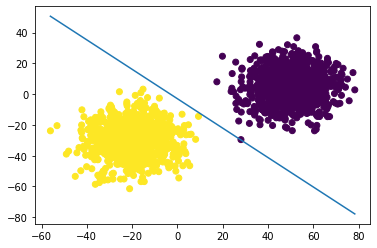

In [36]:
X_sorted = np.array(X[:, 0])
X_sorted.sort()
Y_pred = -(a_pred[0]/a_pred[1])*X_sorted - (b_pred/a_pred[1])
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot(X_sorted, Y_pred)

In [37]:
Y_predicted = (sigmoid(X.dot(a_pred) + b_pred) > 0.5).astype(np.int8)
print("Accur = ", (Y_predicted[:, 0] == Y).mean())

Accur =  1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [38]:
class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        if not self.n_feats:
            self.n_feats = X.shape[1]
        else:
            self.n_feats = min(self.n_feats, X.shape[1])
        # taking X and y
        # creating tree
        self.root = self._create_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _create_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping  working
        if (depth >= self.max_depth or n_labels == 1  or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            # returning Node
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._create_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._create_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common
    
    
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None



def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

In [39]:
labels = np.random.randint(0, 2, 200)
noise = 0.6
x = (np.random.rand(200) + labels) / 2
y = x*(-1) + np.random.rand(200) * noise

x = x.reshape(-1, 1)*200
y = y.reshape(-1, 1)*200
labels = labels.reshape(-1, 1)
data= np.hstack([x,y,labels]).astype("int")

np.random.shuffle(data)
train_x,train_y = data[:,[0,1]][:70],data[:,2][:70]
test_x,test_y = data[:,[0,1]][70:],data[:,2][70:]

from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = DecisionTree(max_depth=10)
clf.fit(train_x,train_y )
    
y_pred = clf.predict(test_x)
acc = accuracy(test_y,y_pred)

print ("Accur:", acc)

Accur: 1.0
